Importing Libraries

  - `pandas` as `pd` for data manipulation and analysis.
  - `numpy` as `np` for numerical operations.
  - `matplotlib.pyplot` as `plt` for creating visualizations.
  - `ast` for safely evaluating strings into python objects.
  - `seaborn` as `sns` for statistical data visualization and enhanced plotting.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast  
import seaborn as sns

##### Loading Data

- **Reading CSV File:** reading a csv file into a dataframe named `df`, which is used for data analysis and manipulation.


In [2]:
df = pd.read_csv(r'D:\Python\Python course\data_jobs.csv')
df.sample(2)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Python\\Python course\\data_jobs.csv'

##### Data Cleanup

- **Renaming Columns:** assigning new column names to the dataframe.

- **Converting Dates:** using `pd.to_datetime()` to change the 'posted_dt' column from string to datetime format.

- **Converting Skills:**
  - using `.apply() `function to convert 'skills' from string to list format by applying a custom function to  every row of a dataFrame.
  - using `ast.literal_eval()` to evaluate and convert strings to python objects.
  - ensuring conversion only happens if the value is not missing using `pd.notna(gg)`.

- **Handling Missing Values:** optionally dropping rows with missing values in the 'salyr' column using `df.dropna()` (commented out).

In [ ]:
new_columns = ['job', 'full_name', 'location', 'via', 'schedule', 'work_from_home','search_location','posted_dt','no_degree','health_ins','country','salrate','salyr','salhr','company','skills','skilltype']
df.columns = new_columns

# data clean up
df['posted_dt'] = pd.to_datetime(df['posted_dt'])                                          
df['skills'] = df['skills'].apply(lambda gg: ast.literal_eval(gg) if pd.notna(gg) else gg) 
#df.dropna(subset=['salyr'],inplace=True)

Random sample of 2 rows from the modified dataFrame `df`

In [ ]:
df.sample(2)

,job,full_name,location,via,schedule,work_from_home,search_location,posted_dt,no_degree,health_ins,country,salrate,salyr,salhr,company,skills,skilltype
720076,Data Analyst,Database Analyst,"Orlando, FL",via Trabajo.org,Full-time,False,"Florida, United States",2023-11-19 21:01:22,True,False,United States,NaN,NaN,NaN,"ViziRecruiter,LLC.","[sql, sql server, oracle]","{'cloud': ['oracle'], 'databases': ['sql serve..."
540427,Data Scientist,"Research Data Scientist / Big Data Engineer, A...",Hong Kong,via Indeed,Full-time,False,Hong Kong,2023-01-12 20:11:37,False,False,Hong Kong,NaN,NaN,NaN,SmartBLKTrade Limited (SBT),"[c, c++, java, go, python, r, javascript, ruby...","{'analyst_tools': ['sas'], 'programming': ['c'..."


## Exploratory Data Analysis for all Data Roles

Creating a Copy

- creating a copy of the original dataframe `df` and assigning it to `df1`. this ensures that `df1` is a separate instance, allowing modifications without affecting the original dataframe.


In [ ]:
df1 = df.copy()

#### Explore Countries

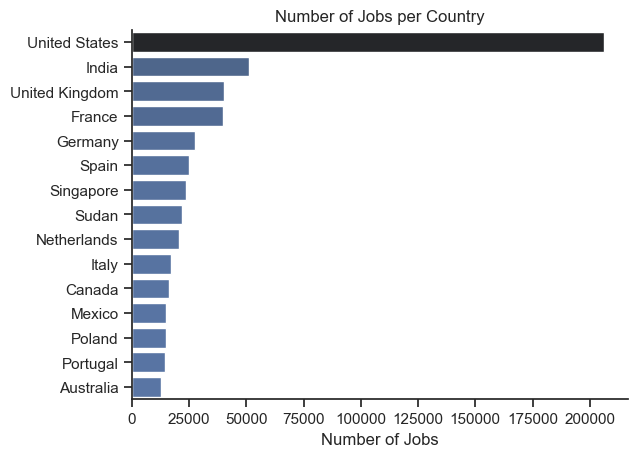

In [ ]:
# Data preparation
df_plot = df1['country'].value_counts().head(15).to_frame()

# Setting Up for Plot
sns.set_theme(style='ticks') 

# Creating Plot
sns.barplot(data=df_plot, x='count', y= 'country', hue='count', palette='dark:b_r', legend=False)

# Adding title and labels
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')

# Displaying the plot
sns.despine()  # remove borders
plt.show()


#####  Explore Roles

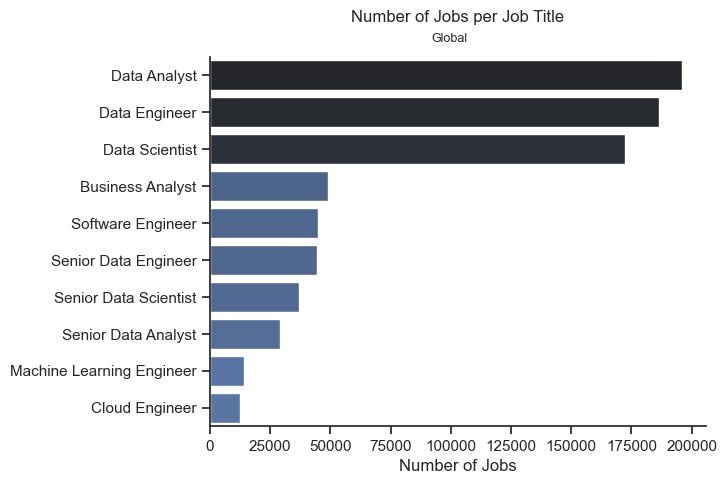

In [ ]:
# Data preparation
df_plot = df1['job'].value_counts().to_frame()

# Setting Up for Plot
sns.set_theme(style='ticks')
fig,ax = plt.subplots(1,1)

# Creating Plot
sns.barplot(data=df_plot, x='count', y= 'job', hue='count', palette='dark:b_r', legend=False)

# Adding title and labels
plt.title('Number of Jobs per Job Title', pad=25)
plt.text(0.5, 0.92, 'Global', ha='center', va='center_baseline', transform=fig.transFigure, fontsize=9)
plt.xlabel('Number of Jobs')
plt.ylabel('')

# Displaying the plot
sns.despine() # to remove borders
plt.show()

#### Explore Companies

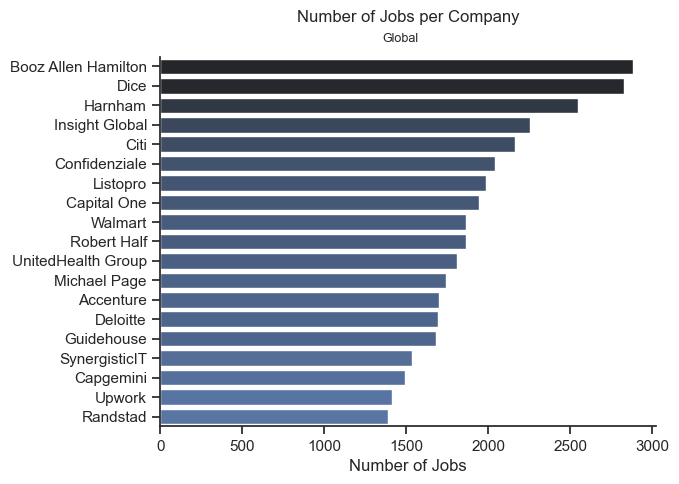

In [ ]:
# Data preparation
df_plot = df1['company'].value_counts().head(20).to_frame()[1:]

# Setting Up for Plot
sns.set_theme(style='ticks')
fig,ax = plt.subplots(1,1)

# Creating Plot
sns.barplot(data=df_plot, x='count', y= 'company', hue='count', palette='dark:b_r', legend=False)

# Adding title and labels
plt.title('Number of Jobs per Company', pad=25)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.text(0.5, 0.92, 'Global', ha='center', va='center_baseline', transform=fig.transFigure, fontsize=9)    

# Displaying the plot
sns.despine()   # to remove borders
plt.show()


#### Explores Job Opportunities 

Method 1

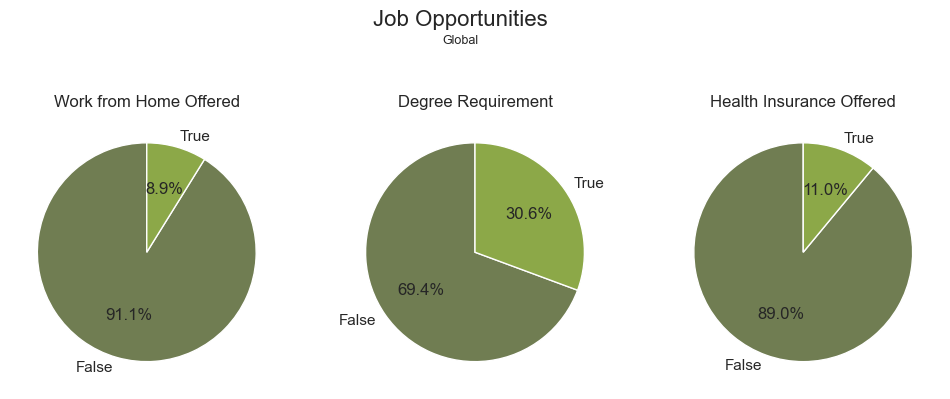

In [ ]:
dict_benefits = {
    'work_from_home': 'Work from Home Offered',
    'no_degree': 'Degree Requirement',
    'health_ins': 'Health Insurance Offered'
}

# Setting Up for Plot
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))
colours = ['#707D52', '#8CA848']

# Creating Plot
for i, (benefit, title) in enumerate(dict_benefits.items()):
    ax[i].pie(df1[benefit].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90, colors= colours)
    ax[i].set_title(title)

# Adding title and labels
plt.suptitle('Job Opportunities', fontsize=16)
plt.text(0.5, 0.92, 'Global', ha='center', va='center_baseline', transform=fig.transFigure, fontsize=9)

# Displaying the plot
plt.show()

Method 2

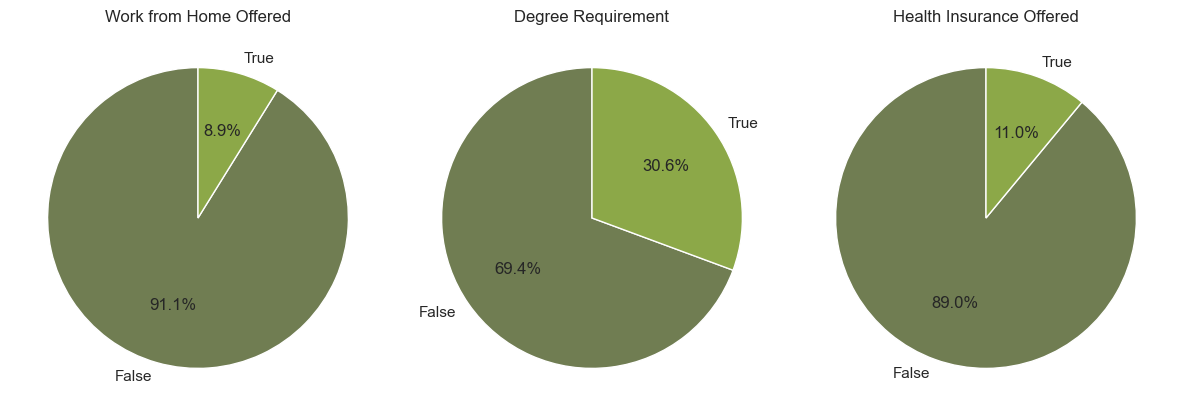

In [ ]:

benefits = {
    'work_from_home': 'Work from Home Offered',
    'no_degree': 'Degree Requirement',
    'health_ins': 'Health Insurance Offered'
}

# Data preparation
dict_i = {gg : df1[gg].value_counts() for gg in benefits.keys()}

# Setting Up for Plot
fig,ax = plt.subplots(1,len(benefits))
fig.set_size_inches(12,5)
colours = ['#707D52', '#8CA848']

# Creating Plot
for i,(key,value) in enumerate(benefits.items()):
    dict_i[key].plot(kind='pie', y= 'count', ax = ax[i], title = value, startangle= 90, autopct='%1.1f%%', colors= colours )
    ax[i].set_ylabel('')

# Displaying the plot
plt.tight_layout()
plt.show()

## Exploratory Data Analysis for Top 3 Data Jobs in India

- **Filtering and Counting:** filtering the dataframe to include only rows where the `country` is `'India'`.

- **Counting Job Titles:** counting the occurrences of each job title in this subset.

- **Selecting Top Titles:** selecting the top three most frequent job titles and converting them to a list named `job_list`.

In [ ]:
job_list = df['job'][df['country']== 'India'].value_counts().head(3).index.to_list()  # filtering top 3 data jobs in india and converting into a lists
job_list

['Data Engineer', 'Data Scientist', 'Data Analyst']

Filtering

-  filtering the dataframe to include only rows where the `job` is one of the job titles in `job_list` and the `country` is `'India'`. this creates a new dataframe `df_ind` with the selected job titles and country.

In [ ]:
df_ind = df[(df['job'].isin(job_list)) & (df['country']== 'India')]
df_ind.sample(2)

,job,full_name,location,via,schedule,work_from_home,search_location,posted_dt,no_degree,health_ins,country,salrate,salyr,salhr,company,skills,skilltype
136440,Data Scientist,Data Scientist,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-05-09 08:30:34,False,False,India,NaN,NaN,NaN,Hogarth,"[python, scala, sql, r, azure, aws, gcp, spark...","{'analyst_tools': ['power bi', 'tableau'], 'cl..."
205669,Data Engineer,Data Engineer: Data Modeling,"Hyderabad, Telangana, India",via LinkedIn,Full-time,False,India,2023-03-10 22:21:24,False,False,India,NaN,NaN,NaN,IBM,"[sql, java, python, scala, shell, ibm cloud, h...","{'cloud': ['ibm cloud'], 'libraries': ['hadoop..."


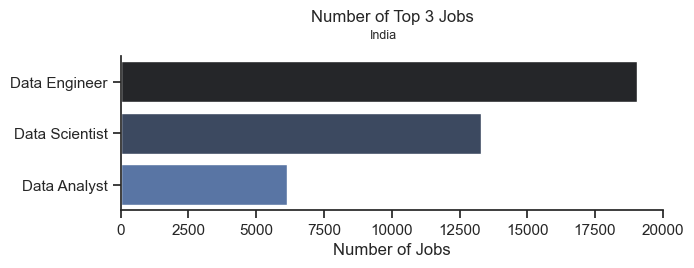

In [ ]:
# Data preparation
df_job = df_ind['job'].value_counts().head(10).to_frame()

# Setting Up for Plot
fig,ax = plt.subplots(1,1, figsize= (7,2))
sns.set_theme(style='ticks')

# Creating Plot
sns.barplot(data=df_job, x='count', y= 'job', hue='count', palette='dark:b_r', legend=False)

# Adding title and labels
plt.title('Number of Top 3 Jobs', pad=25)
plt.text(0.5, 0.99, 'India', ha='center', va='center_baseline', transform=fig.transFigure, fontsize=9)
plt.xlabel('Number of Jobs')
plt.ylabel('')

# Displaying the plot
sns.despine()   # to remove borders
plt.show()

#### Locations to Explore

- **Counting Occurrences:** counting the occurrences of each location in the `df_ind` dataframe and creating a new dataframe `df_ind_loc` containing the top 10 most common locations.

- **Resetting Index:** resetting the index of `df_ind_loc`, turning the current index into a column.

- **Splitting Location:** splitting the `location` column on commas and retaining only the first part of each location string.

- **Replacing Values:** replacing occurrences of `'India'` in the `location` column with `'Anywhere in India'`.

- **Setting Index:** setting the `location` column as the index of the `df_ind_loc` dataframe, making it the row index for easier analysis and plotting.


In [ ]:

df_ind_loc = df_ind['location'].value_counts().head(10).to_frame()
df_ind_loc.reset_index(inplace=True)
df_ind_loc['location'] = df_ind_loc['location'].str.split(',').str[0]
df_ind_loc['location'] = df_ind_loc['location'].replace({'India': 'Anywhere in India'})
df_ind_loc.set_index('location',inplace=True)

df_ind_loc

,count
location,
Bengaluru,8856
Anywhere in India,5513
Hyderabad,4776
Anywhere,3964
Pune,2664
Chennai,2353
Mumbai,1981
Gurugram,1727
New Delhi,1010


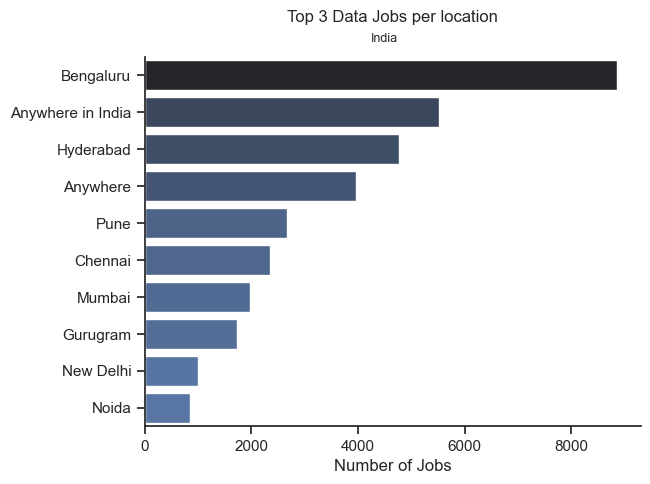

In [ ]:
# Setting Up for Plot
fig,ax = plt.subplots(1,1)
sns.set_theme(style='ticks')

# Creating Plot
sns.barplot(data=df_ind_loc, x='count', y= 'location', hue='count', palette='dark:b_r', legend=False)

# Adding title and labels
plt.title('Top 3 Data Jobs per location', pad = 25)
plt.text(0.5, 0.92, 'India', ha='center', va='center_baseline', transform=fig.transFigure, fontsize=9)
plt.xlabel('Number of Jobs')
plt.ylabel('')

# Displaying the plot
sns.despine()    # to remove borders
plt.show()

#### Companies to Explore

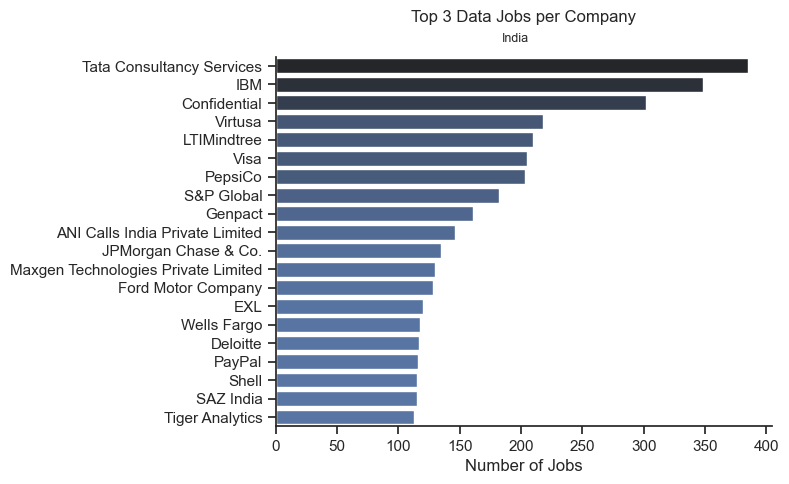

In [ ]:
# Data preparation
df_ind_com = df_ind['company'].value_counts().head(20).to_frame()

# Setting Up for Plot
fig,ax = plt.subplots(1,1)
sns.set_theme(style='ticks')

# Createing Plot
sns.barplot(data=df_ind_com, x='count', y= 'company', hue='count', palette='dark:b_r', legend=False)

# Adding title and labels
plt.title('Top 3 Data Jobs per Company', pad=25)
plt.text(0.5, 0.92, 'India', ha='center', va='center_baseline', transform=fig.transFigure, fontsize=9)
plt.xlabel('Number of Jobs')
plt.ylabel('')

# Displaying the plot
sns.despine()     # to remove borders
plt.show()

#### Job Opportunities to Explore

Method 1

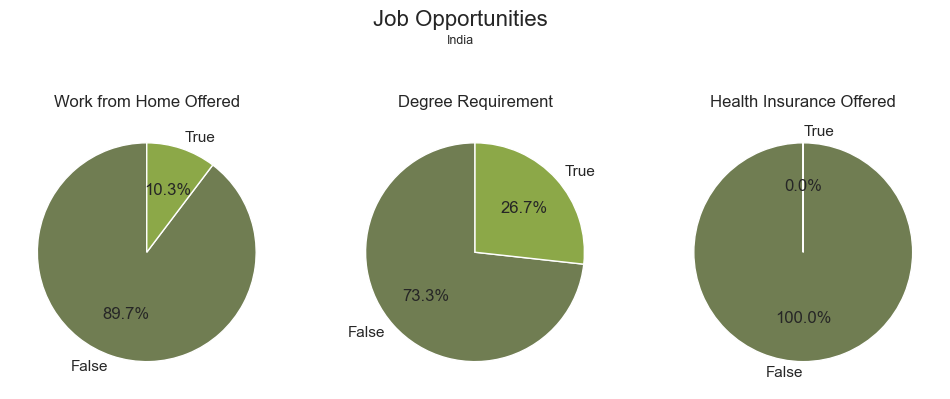

In [ ]:
dict_benefits = {
    'work_from_home': 'Work from Home Offered',
    'no_degree': 'Degree Requirement',
    'health_ins': 'Health Insurance Offered'
}

# Setting Up for Plot
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))
colours = ['#707D52', '#8CA848']

# Createing Plot
for i, (benefit, title) in enumerate(dict_benefits.items()):
    ax[i].pie(df_ind[benefit].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90, colors= colours)
    ax[i].set_title(title)

# Adding title and labels
plt.suptitle('Job Opportunities', fontsize=16)
plt.text(0.5, 0.92, 'India', ha='center', va='center_baseline', transform=fig.transFigure, fontsize=9)

# Displaying the plot
plt.show()

Method 2

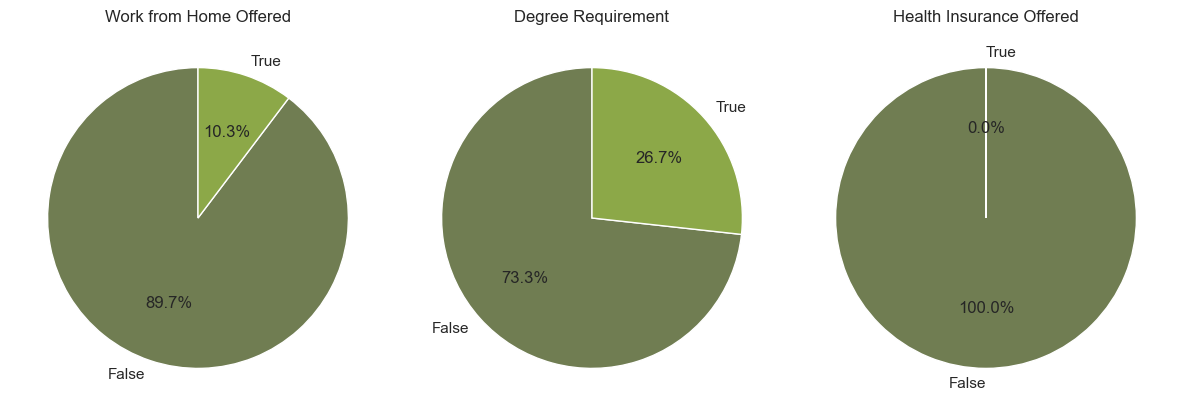

In [ ]:

benefits = {
    'work_from_home': 'Work from Home Offered',
    'no_degree': 'Degree Requirement',
    'health_ins': 'Health Insurance Offered'
}

# Data preparation
dict = {gg : df_ind[gg].value_counts() for gg in benefits.keys()}

# Setting Up for Plot
fig,ax = plt.subplots(1,len(benefits))
fig.set_size_inches(12,5)
colours = ['#707D52', '#8CA848']

# Createing Plot
for i,(key,value) in enumerate(benefits.items()):
    dict[key].plot(kind='pie', y= 'count', ax = ax[i], title = value, startangle= 90, autopct='%1.1f%%',colors= colours )
    ax[i].set_ylabel('')
    
# Displaying the plot
plt.tight_layout()
plt.show()

<span style="color:#d7ba7d; font-size:50px;"> End </span>

---